In [2]:
import pandas as pd
df = pd.read_csv('Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [4]:
df.describe(include='object')

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275


In [5]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [6]:
# Creating a copy of the DataFrame for processing
data_clean = df.copy()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Setting the aestheitc style of the plots
sns.set_style('darkgrid')

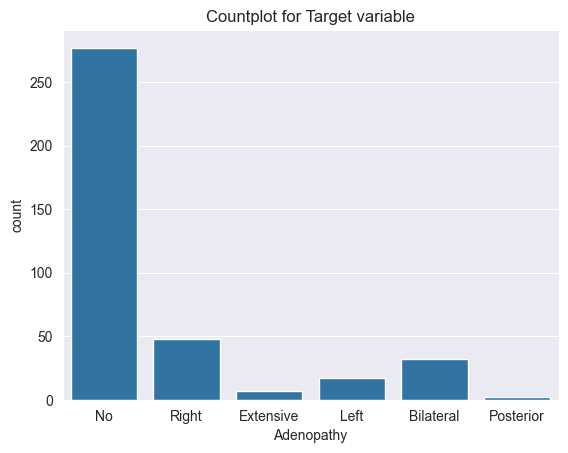

In [9]:
sns.countplot(x='Adenopathy',data=df)
plt.title("Countplot for Target variable");

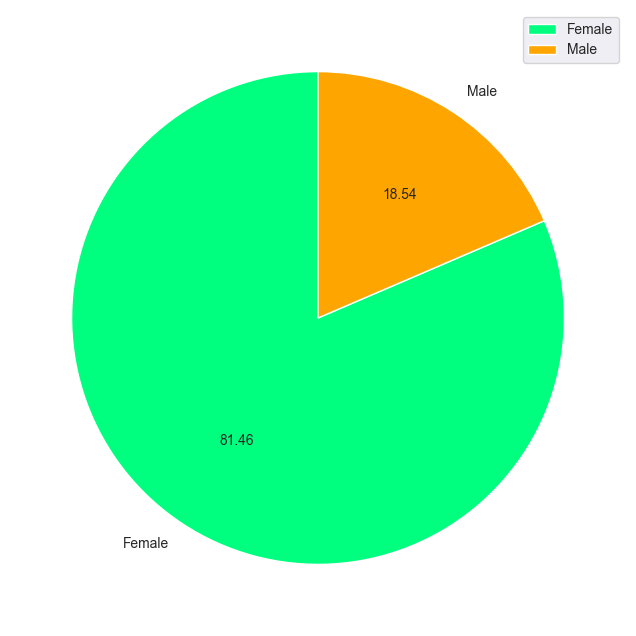

In [10]:
plt.figure(figsize=(10,8))
plt.pie(x=df.Gender.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['springgreen','orange'],
        autopct='%.2f'
       );
plt.legend();

In [11]:
#Create Age Groups

data_clean['age_group']=pd.cut(data_clean['Age'], bins=[10, 20,30,40,50,60,70,80], labels=['10-20','20-30','30-40','40-50','50-60','60-70','70-80'])

In [12]:
#Analyze the distribution of smoking status across different age groups and genders
smoking_status_distribution = pd.crosstab(index=[data_clean['age_group'], data_clean['Gender']], columns=data_clean['Smoking'])
smoking_status_distribution

Smoking           No  Yes
age_group Gender         
10-20     F       10    0
          M        3    0
20-30     F       85    3
          M        6    2
30-40     F       92    0
          M        7   12
40-50     F       50    0
          M        7    4
50-60     F       36    2
          M        6    6
60-70     F       23    1
          M        2    7
70-80     F        6    3
          M        0    7

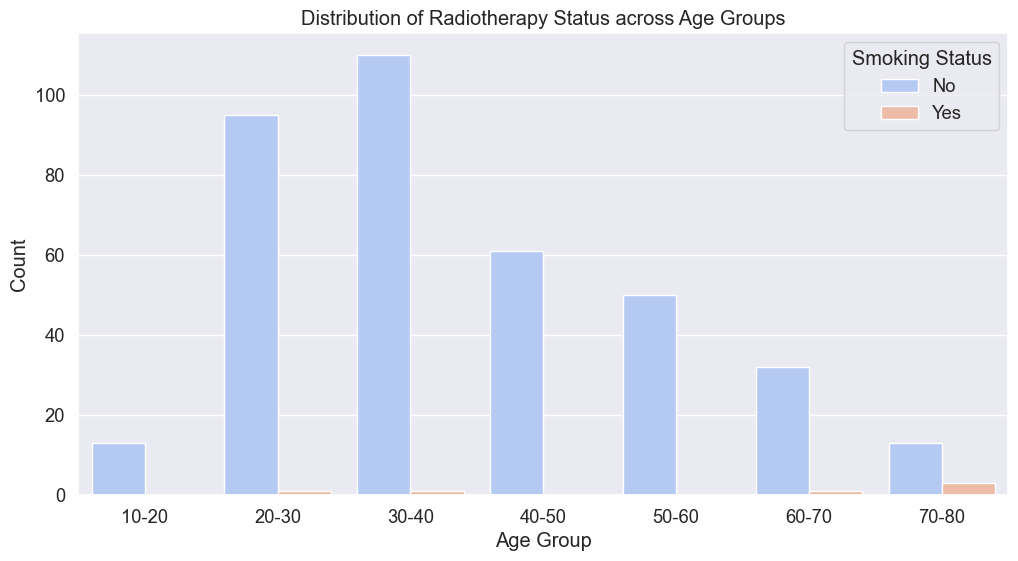

In [17]:
#Visualize the distribution of smoking status across different age groups and genders
plt.figure(figsize=(12,6))
sns.countplot(x='age_group', hue='Hx Radiothreapy', data=data_clean, palette='coolwarm')
plt.title('Distribution of Radiotherapy Status across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()

In [14]:
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': [8,8]}, font_scale=1.2)


C:\Users\PC\AppData\Local\Temp\ipykernel_7548\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

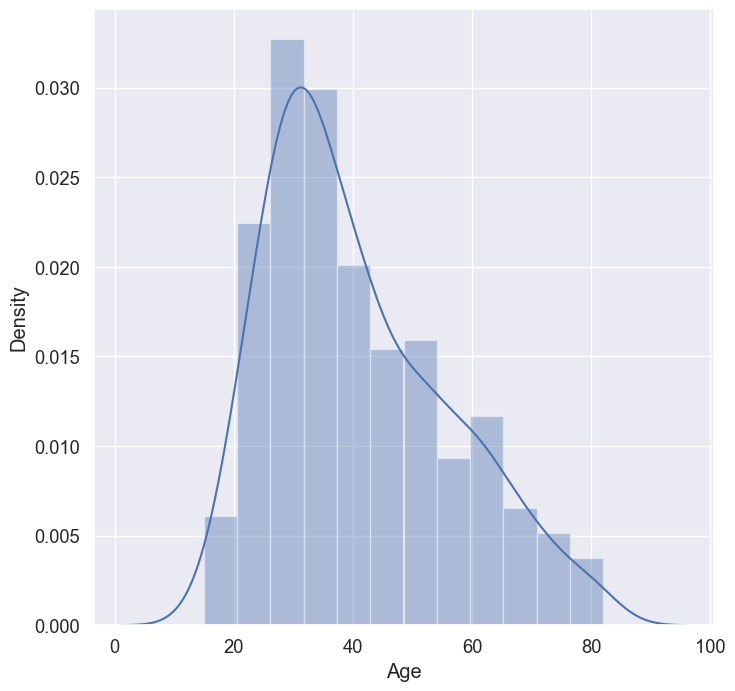

In [15]:
sns.distplot(df['Age'])

C:\Users\PC\AppData\Local\Temp\ipykernel_7548\1644872855.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Gender'])


ValueError: could not convert string to float: 'F'

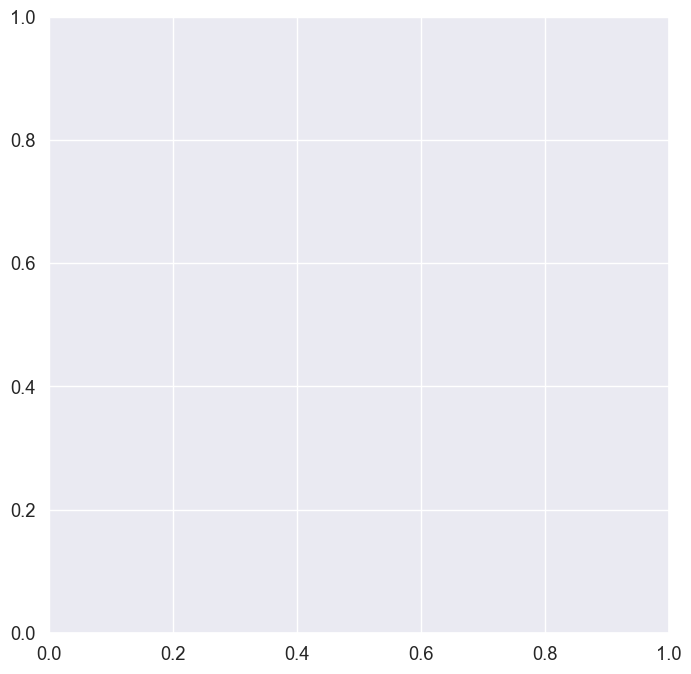

In [16]:
sns.distplot(df['Gender'])

In [ ]:
#import necessary libraries for statisitical testing
from scipy.stats import ttest_ind

In [ ]:
#Select only the relevant columns for health indicators
health_data = data_clean[['current_smoker','heart_rate','systolic_bp','diastolic_bp','chol']]

KeyError: "None of [Index(['current_smoker', 'heart_rate', 'systolic_bp', 'diastolic_bp', 'chol'], dtype='object')] are in the [columns]"